In [1]:
from src.main import Report, pd, show_cluster_list, plt

In [2]:
report_16 = Report('src/data/format-2016-world-copper-2063-trade.json', '2016')
report_17 = Report('src/data/format-2017-world-copper-2063-trade.json', '2017')
report_18 = Report('src/data/format-2018-world-copper-2063-trade.json', '2018')
report_19 = Report('src/data/2019-world-copper-2063-trade.csv', '2019')
report_20 = Report('src/data/format-2020-world-copper-2063-trade.json', '2020')

In [3]:
reports = [report_16, report_17, report_18, report_19, report_20]

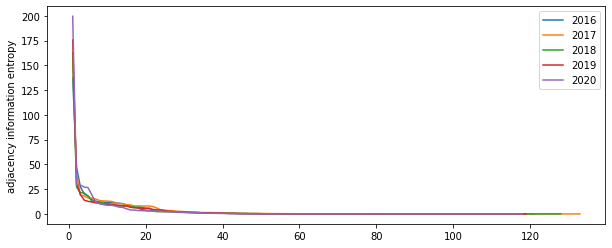

In [4]:
plt.figure(figsize=(10, 4))
report_16.draw_entropy_plot()
report_17.draw_entropy_plot()
report_18.draw_entropy_plot()
report_19.draw_entropy_plot()
report_20.draw_entropy_plot()

plt.legend()
plt.show()


In [5]:
for report in reports:
    report.cluster_nodes()

In [6]:
show_cluster_list(reports)

,code,code,code,code,code
label,,,,,
1,156,156,156,156,156
2,97,97,97,152,"97,124,975,724"
3,528,"410,724,100,152,784","410,975,152",724,276
4,"124,410","276,699,975,604,36","276,724,100,710,392,757,604","410,276,116,100,等12项","410,842,392,76,152,860"
5,"100,276,152,724,等13项","124,826,842,392,等10项","124,36,842,699,826,76,268,376,48","124,528,710,458,等13项","268,36,604"
6,"616,381,484,752,等103项","490,516,458,608,等111项","116,490,458,752,等107项","360,826,704,381,等91项","710,458,490,251,等103项"


In [7]:
report_16.show_nodes_attribute()

     code                              name  IS  OS  DC  BC  CC  label
0     156                             China   1   6   1   1   1      1
1      97                             EU-28   3   6   2   2   2      2
2     528                       Netherlands   6   6   4   4   2      3
3     124                            Canada   5   4   3   4   2      4
4     410                     Rep. of Korea   3   6   4   5   2      4
..    ...                               ...  ..  ..  ..  ..  ..    ...
116    70                Bosnia Herzegovina   6   6   6   6   3      6
117   788                           Tunisia   6   6   6   6   3      6
118    68  Bolivia (Plurinational State of)   6   6   6   6   3      6
119   834           United Rep. of Tanzania   6   6   5   6   4      6
120   646                            Rwanda   6   6   6   6   6      6

[121 rows x 8 columns]


In [8]:
pd.DataFrame(report_19.decision_list)[report_19.attribute_names + ['label']].sort_values('label')

,IS,OS,DC,BC,CC,label
0,NaN,NaN,1,NaN,NaN,1
1,NaN,1.0,2,NaN,NaN,2
2,NaN,2.0,2,NaN,NaN,2
3,NaN,3.0,2,NaN,NaN,2
5,NaN,5.0,2,NaN,NaN,2
...,...,...,...,...,...,...
39,1.0,NaN,5,NaN,NaN,6
64,6.0,NaN,5,6.0,1.0,6
65,6.0,1.0,5,6.0,2.0,6
67,6.0,3.0,5,6.0,2.0,6


In [20]:
attribute_distribute = {
    '2016': report_16.decision_attribute_distribute,
    '2017': report_17.decision_attribute_distribute,
    '2018': report_18.decision_attribute_distribute,
    '2019': report_19.decision_attribute_distribute,
    '2020': report_20.decision_attribute_distribute,
}
pd.DataFrame(attribute_distribute)

,2016,2017,2018,2019,2020
IS,0.695652,0.666667,0.424242,0.744186,0.717391
OS,0.130435,0.348485,0.424242,0.209302,0.586957
DC,1.000000,1.000000,1.000000,1.000000,1.000000
BC,0.586957,0.393939,0.424242,0.686047,0.130435
CC,0.391304,0.515152,0.500000,0.406977,0.369565
